In [41]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout

In [2]:
# initialize model
model = Sequential()
# add first hidden layer (784 layer assumed)
model.add(Dense(500, input_shape=(784,), activation='relu'))
model.add(Dropout(0.2))
# add second hidden layer
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [4]:
#import data from MNIST Database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# massage data
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = (X_train.astype('float32'))/255
X_test = (X_test.astype('float32'))/255

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [12]:
# train model
model.fit(X_train, Y_train, batch_size=128, epochs=4, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 7s - loss: 0.0124 - acc: 0.9179 - val_loss: 0.0054 - val_acc: 0.9646
Epoch 2/4
60000/60000 [==============================] - 7s - loss: 0.0057 - acc: 0.9629 - val_loss: 0.0044 - val_acc: 0.9708
Epoch 3/4
60000/60000 [==============================] - 7s - loss: 0.0043 - acc: 0.9732 - val_loss: 0.0036 - val_acc: 0.9768
Epoch 4/4
60000/60000 [==============================] - 7s - loss: 0.0035 - acc: 0.9777 - val_loss: 0.0035 - val_acc: 0.9772


In [20]:
# evaluate model
score = model.evaluate(X_test, Y_test, verbose=2)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.00346304196436
Test accuracy: 0.9772


In [19]:
# extract model and save weights to a .mat file
weights = model.get_weights()

# write individual layers to a dictionary
weight_dict = {}
# initiate counters
layer_count = 0
bias_count = 0
for i, layer in enumerate(weights):
    # sort into odd and even indices
    if i%2 == 0:
        layer_count += 1
        weight_dict['weights_{0}'.format(layer_count)] = weights[i]
    else:
        bias_count += 1
        weight_dict['biases_{0}'.format(bias_count)] = weights[i]

# save weights and biases into .mat file
io.savemat('./weights.mat',weight_dict)

In [21]:
# save MNIST data to a .mat file
test_data = {
    'X_test':X_test,
    'Y_test':Y_test
}

io.savemat('./test_data.mat', test_data)

In [50]:
# extract model and save weights to a .mat file
weights = model.get_weights()
W1 = weights[0]
B1 = weights[1]
W2 = weights[2]
B2 = weights[3]
W3 = weights[4]
B3 = weights[5]

X1 = X_test[10,:]

X2 = np.matmul(np.transpose(W1), X1)+ B1
X2[X2 < 0] = 0
X3 = np.matmul(np.transpose(W2), X2) + B2
X3[X3 <0] = 0
X4 = np.matmul(np.transpose(W3), X3) + B3
np.argmax(X4)

3

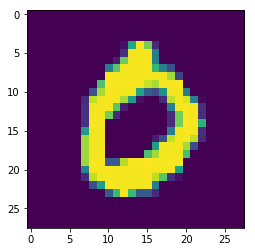

In [48]:
image = X1.reshape((28,28))
fig, ax = plt.subplots()
ax.imshow(image)
plt.show()